<a href="https://colab.research.google.com/github/ZhizhchenkoA/Mechanic_Project/blob/main/Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from functools import cache

In [159]:

mu = 0.2
def f(x, y):
  r1 = ((x + mu) ** 2 + y ** 2) ** 0.5
  r2 = ((x - 1 + mu) ** 2 + y ** 2) ** 0.5
  return (x ** 2 + y ** 2) / 2 + (1 - mu) / r1 + mu / r2 + ((1 - mu) * mu) / 2

def diff_u_x(x, y):
  delta = 0.00001
  return (-1) * (f(x + delta, y) - f(x, y)) / delta

def diff_u_y(x, y):
  delta = 0.00001
  return (-1) * (f(x, y + delta) - f(x, y)) / delta

def x_dot(x, y, px, py):
  return px + y

def y_dot(x, y, px, py):
  return py - x

def px_dot(x, y, px, py):
  return py - x + diff_u_x(x, y)

def py_dot(x, y, px, py):
  return -px - y + diff_u_y(x, y)

def W(x, y):
  return -math.log((abs(diff_u_x(x, y)) + abs(diff_u_y(x, y))) ** 0.01 + 1e-10, 10)

100%|██████████| 300/300 [00:02<00:00, 149.47it/s]


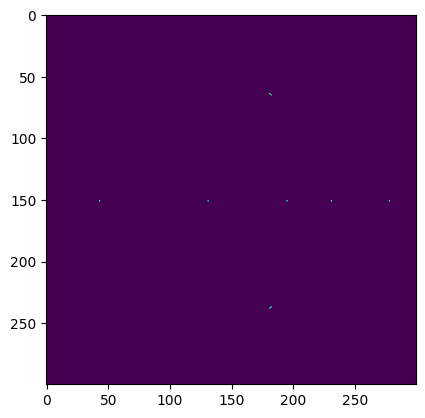

In [160]:

lim_x_min, lim_x_max = -1.5, 1.5
step_x = 0.01
lim_y_min, lim_y_max = -1.5, 1.5
step_y = 0.01
mx = np.arange(lim_x_min, lim_x_max, step_x)
my = np.arange(lim_y_min, lim_y_max, step_y)
ans_x, ans_y = np.array([]), np.array([])
xg, yg = [], []
epsilon = 0

for x in tqdm(mx):
  for y in my:
    if (f(x, y) - f(x - step_x, y)) * (f(x + step_x, y) - f(x, y)) < epsilon and \
     (f(x, y) - f(x, y - step_y)) * (f(x, y + step_y) - f(x, y)) < epsilon:
        ans_x = np.append(ans_x, x)
        ans_y = np.append(ans_y, y)
        xg.append(int((lim_x_min + x) * (1 / step_x)))
        yg.append(int((lim_y_min + y) * (1 / step_y)))

k = int((lim_x_max - lim_x_min) / step_x)
arr = np.zeros((k, k))
arr[yg, xg] = 1
plt.imshow(arr)
plt.show()

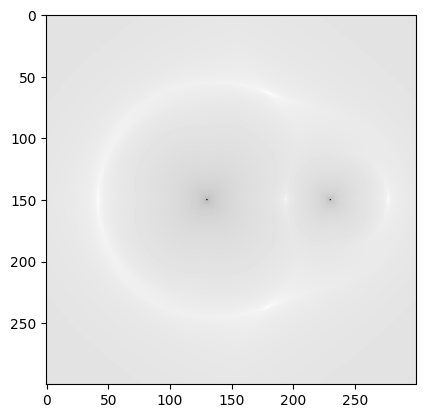

In [161]:
x_massiv = int((lim_x_max - lim_x_min) / step_x)
y_massiv = int((lim_y_max - lim_y_min) / step_y)
DAT = [[0] * y_massiv for _ in range(x_massiv)]
for i in range(x_massiv):
  for j in range(y_massiv):
    DAT[j][i] = (W(i * step_x + lim_x_min, j * step_y + lim_y_min))
# print(DAT)
plt.imshow(DAT, cmap='gray')

In [168]:

def move(x, y, px=0, py=0, t = 100000):
  delta_t = 0.0001
  X, Y, PX, PY = [x], [y], [px], [py]
  for _ in tqdm(range(t)):
    X.append(X[-1] + x_dot(x, y, px, py) * delta_t)
    Y.append(Y[-1] + y_dot(x, y, px, py) * delta_t)
    PX.append(PX[-1] + px_dot(x, y, px, py) * delta_t)
    PY.append(PY[-1] + py_dot(x, y, px, py) * delta_t)
    x = X[-1]
    y = Y[-1]
    px = PX[-1]
    py = PY[-1]
  plt.scatter([-mu, 1 - mu], [0, 0], c='green')
  plt.plot(X, Y)
  plt.scatter(ans_x, ans_y, c='black')
  plt.xlim(-1.5, 1.5)
  plt.ylim(-1.5, 1.5)
  plt.show()

In [208]:

L_x = [ans_x[6], ans_x[8], ans_x[0], ans_x[3], ans_x[2]]
L_y = [ans_y[6], ans_y[8], ans_y[0], ans_y[3], ans_y[2]]

# for i in range(5):
#   print(L_x[i], L_y[i])

0.4400000000000017 1.3322676295501878e-15
1.2700000000000022 1.3322676295501878e-15
-1.0799999999999996 1.3322676295501878e-15
0.3000000000000016 0.8700000000000019
0.3000000000000016 -0.8699999999999994


100%|██████████| 500000/500000 [00:12<00:00, 38639.59it/s]


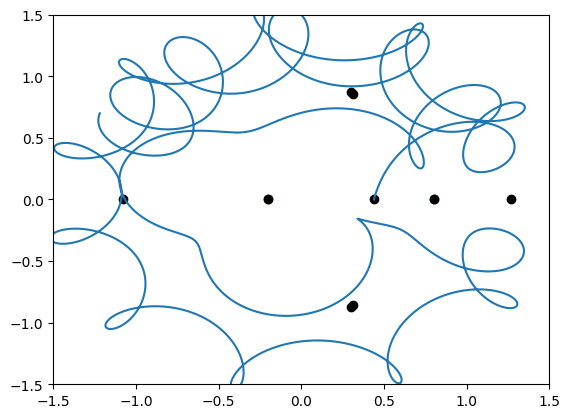

In [231]:
L1 = move(L_x[0], L_y[0], px=0.45, py=0.4588, t=100000)

100%|██████████| 100000/100000 [00:03<00:00, 30011.23it/s]


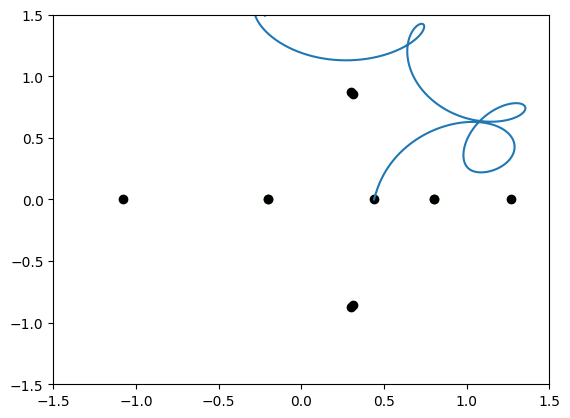

In [202]:
L2 = move(L_x[1], L_y[1], px=0, py=0.47, t=100000)

In [ ]:
L3 = move(L_x[2], L_y[2], px=0, py=0, t=100000)

100%|██████████| 1000000/1000000 [00:20<00:00, 48570.32it/s]


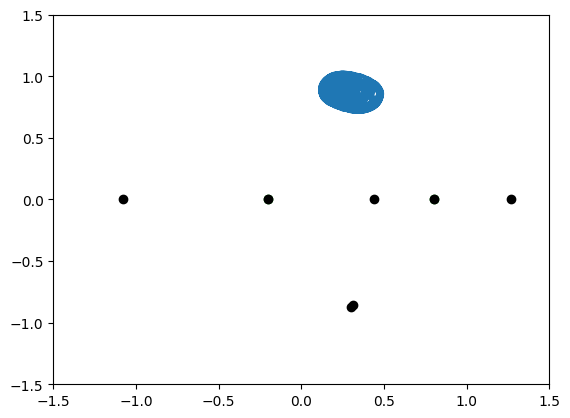

In [196]:
L4 = move(L_x[3], L_y[3], px=-1, py=0, t=1000000)

100%|██████████| 1000000/1000000 [00:21<00:00, 46202.12it/s]


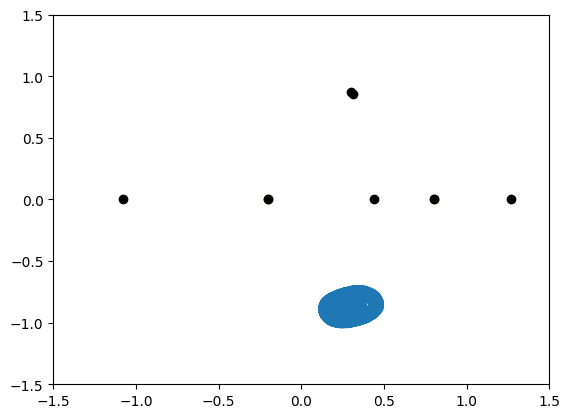

In [197]:
L5 = move(L_x[4], L_y[4], px=1, py=0, t=1000000)
